In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [82]:
import scipy.stats

In [83]:
xdat = []
ydat_exc = []
yerrs_exc = []

ydat_pv = []
yerrs_pv = []

ydat_som = []
yerrs_som = []

for stri in range(9):
    stimstr = 0.2*stri
    filedir = '%.1f'%stimstr
    print('%s/all_spikes.pickle'%filedir)
    
    try:
        with open('%s/all_spikes.pickle'%filedir, 'rb') as file:
            all_spikes = pickle.load(file)
    except FileNotFoundError:
        continue
        
    xdat.append(stimstr)
    
    exc_positions = np.load('%s/exc_positions.npy'%filedir)
    
    control_times = []
    chr_times = []
    ii = 0
    is_control = True
    while True:
        start_time = ii * 500
        stop_time = start_time + 40
        if is_control:
            control_times.append(start_time)
        else:
            chr_times.append(start_time)   
        ii += 1
        if is_control:
            is_control = False
        else:
            is_control = True        
        if stop_time > 15000: break
            
            
    control_spikes = []
    for ni in range(8000):
        
        pos_x, pos_y, pos_z = exc_positions[:,ni]
        dist = np.sqrt((0.5-pos_x)**2 + (0.5-pos_y)**2)
        if dist > 0.2*2:
            continue
        
        nspikes = 0
        for tim in control_times:
            aa = all_spikes[ni] [all_spikes[ni] > tim ]
            aa = aa [aa < tim+40]
            nspikes += len(aa)
        control_spikes.append(nspikes)      
        
    ydat_exc.append(np.mean(control_spikes))
    yerrs_exc.append(scipy.stats.sem(control_spikes))

    
        
    pv_positions = np.load('%s/pv_positions.npy'%filedir)
    control_spikes = []
    for ni in range(1000):
        
        pos_x, pos_y, pos_z = pv_positions[:,ni]
        dist = np.sqrt((0.5-pos_x)**2 + (0.5-pos_y)**2)
        if dist > 0.2*2:
            continue
        
        nspikes = 0
        for tim in control_times:
            aa = all_spikes[ni+8000] [all_spikes[ni+8000] > tim ]
            aa = aa [aa < tim+40]
            nspikes += len(aa)
        control_spikes.append(nspikes)      
        
    ydat_pv.append(np.mean(control_spikes))
    yerrs_pv.append(scipy.stats.sem(control_spikes))
    
    sst_positions = np.load('%s/som_positions.npy'%filedir)
    control_spikes = []
    for ni in range(1000):
        
        pos_x, pos_y, pos_z = sst_positions[:,ni]
        dist = np.sqrt((0.5-pos_x)**2 + (0.5-pos_y)**2)
        if dist > 0.2*2:
            continue
        
        nspikes = 0
        for tim in control_times:
            aa = all_spikes[ni+9000] [all_spikes[ni+9000] > tim ]
            aa = aa [aa < tim+40]
            nspikes += len(aa)
        control_spikes.append(nspikes)      
        
    ydat_som.append(np.mean(control_spikes))
    yerrs_som.append(scipy.stats.sem(control_spikes))
        

0.0/all_spikes.pickle
0.2/all_spikes.pickle
0.4/all_spikes.pickle
0.6/all_spikes.pickle
0.8/all_spikes.pickle
1.0/all_spikes.pickle
1.2/all_spikes.pickle
1.4/all_spikes.pickle
1.6/all_spikes.pickle


In [84]:
import matplotlib
font = {'family' : 'normal',
#         'weight' : 'bold',
        'size'   : 22}
matplotlib.rc('font', **font)


Text(0, 0.5, 'Firing rate Exc (Hz)')

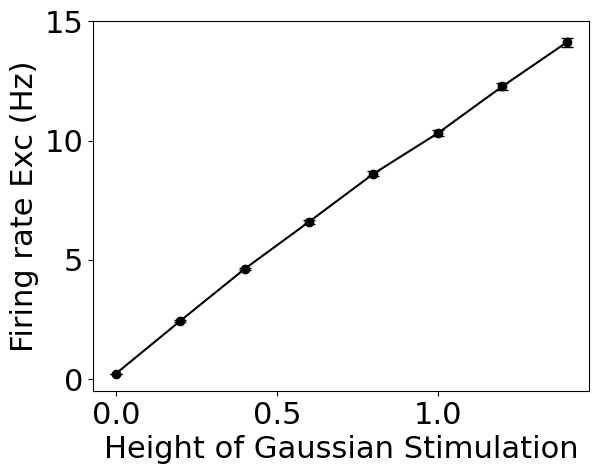

In [85]:
plt.errorbar(xdat, ydat_exc, yerr = yerrs_exc, c='black', capsize=4)
plt.scatter(xdat, ydat_exc, c='black')
plt.xlabel('Height of Gaussian Stimulation')
plt.ylabel('Firing rate Exc (Hz)')

Text(0, 0.5, 'Firing rate PV (Hz)')

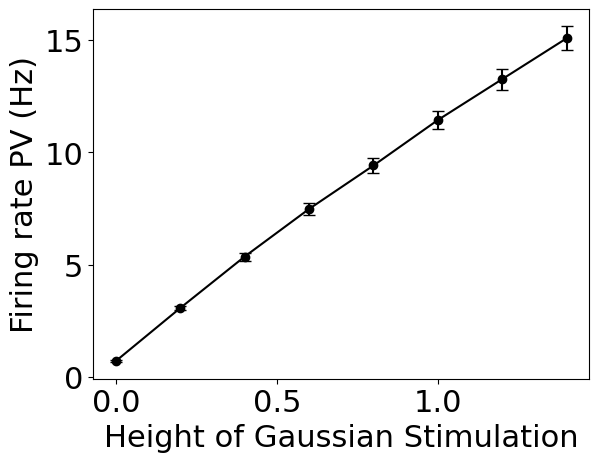

In [86]:
plt.errorbar(xdat, ydat_pv, yerr = yerrs_pv, c='black', capsize=4)
plt.scatter(xdat, ydat_pv, c='black')
plt.xlabel('Height of Gaussian Stimulation')
plt.ylabel('Firing rate PV (Hz)')

Text(0, 0.5, 'Firing rate SST (Hz)')

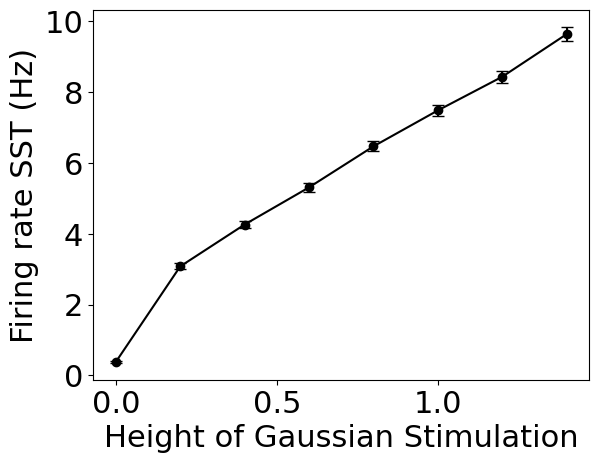

In [87]:
plt.errorbar(xdat, ydat_som, yerr = yerrs_som, c='black', capsize=4)
plt.scatter(xdat, ydat_som, c='black')
plt.xlabel('Height of Gaussian Stimulation')
plt.ylabel('Firing rate SST (Hz)')